In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easygui

f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
I = cv2.imread(f)
grayImage = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) # turn the image into gray scale


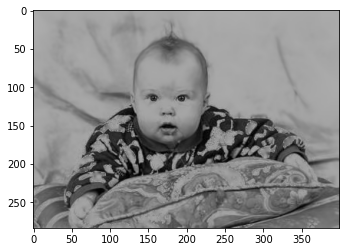

In [ ]:
grayImage = cv2.equalizeHist(grayImage) # equalize the image, brings out the details and fixes some of the

mask = cv2.threshold(grayImage, thresh=180, maxval=255, type=cv2.THRESH_BINARY) # 180, 200 | i use this to get the mask for the inpainting
dst = cv2.inpaint(I,mask[1],3,cv2.INPAINT_TELEA) # combines the threshold and the original image, and paints in where the mask shows

#fixed gray image
grayImage = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY) #converts the inpainted image back to grayscale
grayImage = cv2.fastNlMeansDenoising(grayImage,None,7,21,5) #denoises the image fixing the small imperfections
#pltshow
plt.imshow(cv2.cvtColor(grayImage, cv2.COLOR_GRAY2RGB))
plt.show()

cv2.imshow('image', grayImage)
cv2.waitKey(0)

